In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
diabetes = datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = np.where(diabetes.target > np.median(diabetes.target), 1, 0)


In [ ]:
X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Define the Stacking model (combine base learners)
stacking_model = StackingClassifier(
    estimators=[
        ('knn', knn),  # KNN as one of the base learners
        ('dt', decision_tree),  # Decision Tree as another base learner
        ('lr', logistic_regression)  # Logistic Regression as a base learner
    ],
    final_estimator=LogisticRegression(),  # Meta-learner (Logistic Regression)
    cv=5  # Use 5-fold cross-validation
)


In [ ]:
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking model: {accuracy * 100:.2f}%")


Accuracy of Stacking model: 78.65%


Confusion Matrix:
[[39 10]
 [ 9 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        49
           1       0.76      0.78      0.77        40

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.79      0.79      0.79        89



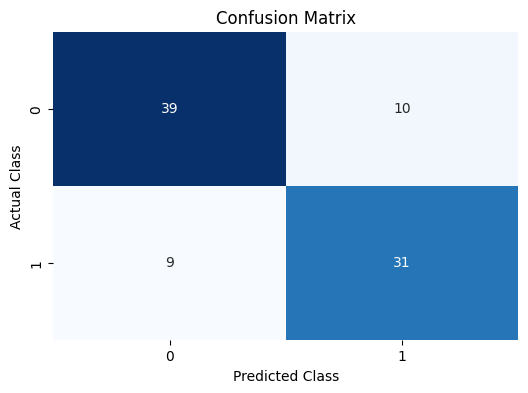

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()